In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

file_path = './data'
os.chdir(file_path)

train_x_df = pd.read_csv('train_x_df.csv',encoding='latin1')

In [3]:
coin9_df = train_x_df[train_x_df['coin_index'] == 9]

In [19]:
 a = train_x_df[train_x_df['volume'] != 0]['coin_index'].value_counts()

In [20]:
b = train_x_df[train_x_df['volume'] == 0]['coin_index'].value_counts()

In [30]:
(b/a * 100)


0     0.936488
1     1.171940
2     0.607160
3     0.633834
4     0.356338
5    94.167393
6     1.110875
7     3.873829
8     1.817524
9     1.340988
Name: coin_index, dtype: float64

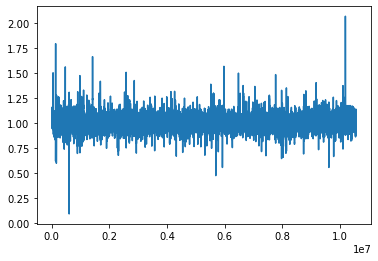

In [12]:
train_x_df['open'].plot(kind = 'box')

In [9]:
train_x_df.plot(kind = 'box', data = 'open')

TypeError: plot() got multiple values for argument 'data'

In [ ]:
tra

data = pd.read_csv('train_x_df.csv',encoding='latin1')
data.head()
    #형변환
data = data.astype('float')
data1 = data.loc[:,['coin_index','open','high','low','close','volume','quote_av','trades','tb_base_av','tb_quote_av']]
data1
pr=data1.profile_report()
pr.to_file('./all_variable.html')
a = random.randint(0,7362)
a
#정규분포 후 eda
normalization_df = (data-data.mean())/data.std()
prr=normalization_df.profile_report()
prr.to_file('./normdist_all_variable.html')
#--------------
#경로
os.chdir('C:/Users/techtech/Downloads/open')
#파일
train_x_df=pd.read_csv('train_x_df.csv')
train_y_df=pd.read_csv('train_y_df.csv')
test_x_df=pd.read_csv('test_x_df.csv')
sample_submission=pd.read_csv('sample_submission.csv')
#형변환
train_x_df = train_x_df.astype('float')
train_y_df = train_y_df.astype('float')
test_x_df = test_x_df.astype('float')
sample_submission=sample_submission.astype('float')
#데이터 구조
print(len(train_x_df)/1380, len(train_y_df)/120)
print(train_x_df.shape)
# 입력 받은 2차원 데이터 프레임을 3차원 numpy array로 변경하는 함수
def df2d_to_array3d(df_2d):
    feature_size = df_2d.iloc[:,2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    array_3d = df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])
    return array_3d
train_x_array = df2d_to_array3d(train_x_df)
train_y_array = df2d_to_array3d(train_y_df)
test_x_array = df2d_to_array3d(test_x_df)
print(f'''
train_x_array {train_x_array.shape}
train_y_array {train_y_array.shape}
test_x_array {test_x_array.shape}
''')
#코인별로 구분
coin0 =[]
coin1 =[]
coin2 =[]
coin3 =[]
coin4 =[]
coin5 =[]
coin6 =[]
coin7 =[]
coin8 =[]
coin9 =[]
# train_x_array[0,0,0]
# train_x_array[0,:,:]
for x in range(7362):
    if train_x_array[x,0,0] ==0:
        coin0.append(x)
    if train_x_array[x,0,0] ==1:
        coin1.append(x)
    if train_x_array[x,0,0] ==2:
        coin2.append(x)
    if train_x_array[x,0,0] ==3:
        coin3.append(x)
    if train_x_array[x,0,0] ==4:
        coin4.append(x)
    if train_x_array[x,0,0] ==5:
        coin5.append(x)
    if train_x_array[x,0,0] ==6:
        coin6.append(x)
    if train_x_array[x,0,0] ==7:
        coin7.append(x)
    if train_x_array[x,0,0] ==8:
        coin8.append(x)
    if train_x_array[x,0,0] ==9:
        coin9.append(x)
# a=0
# a=a+len(coin0)
# a=a+len(coin1)
# a=a+len(coin2)
# a=a+len(coin3)
# a=a+len(coin4)
# a=a+len(coin5)
# a=a+len(coin6)
# a=a+len(coin7)
# a=a+len(coin8)
# a=a+len(coin9)
# print(a)
# train_x_array[coin9,0,0]
# 기간 번호, 시간(23시간, 2시간), 코인 넘버
print(train_x_array)
# 입력 series와 출력 series를 연속적으로 연결하여 시각적으로 보여주는 코드
def plot_series(x_series, y_series):
    plt.plot(x_series, label = 'input_series')
    plt.plot(np.arange(len(x_series), len(x_series)+len(y_series)),
             y_series, label = 'output_se'
                               'ries')
    plt.axhline(1, c = 'red')
    plt.legend()
# sample_id 1012에 해당하는 sample의 분단위 시가 변동 정보 시각화
idx = 1012
plot_series(train_x_array[idx,:,1], train_y_array[idx,:,1])
plt.show()
#----- 하나만 찝어서 돌려보기
# train data 중 sample_id n에 해당하는 x_series로 arima 모델을 학습한 후
# y_sereis를 추론
idx = 5555
x_series = train_x_array[idx,:,1]
y_series = train_y_array[idx,:,1]
# ARIMA의 (p,d,q) 값은 최적화 되지않은 값 입니다.
model = ARIMA(x_series, order=(1,1,1))
fit  = model.fit()
preds = fit.predict(1,120, typ='levels')
plot_series(x_series, y_series)
plt.plot(np.arange(1380, 1380+120), preds, label = 'prediction')
plt.legend()
plt.show()
#----
#modeling
# train 데이터 상단의 n개 샘플로 validation set를 구성하여 학습 및 추론/// 데이터 겁내 커서 그냥 이거까지만 트레이닝셋삼아서 돌려버림
valid_x_df = train_x_df[train_x_df.sample_id < 100]
valid_y_df = train_y_df[train_y_df.sample_id < 100]
valid_x_array = df2d_to_array3d(valid_x_df)
valid_y_array = df2d_to_array3d(valid_y_df)
valid_pred_array = np.zeros([100, 120])
valid_x_array.shape[0]
#auto_arima (최적의 arima모형 도출 ) <-- 실제 모델에 적용해도 뭐 안됨. 그냥 과정중에 하나다 소개하고 넘겨야될듯
model = auto_arima(x_series, stepwise=True, error_action='ignore', seasonal=True)
model.summary()
# arima modeling
for idx in tqdm(range(valid_x_array.shape[0])):
    try:
        try:
            x_series = valid_x_array[idx,:,1]
            model = ARIMA(x_series, order=(1,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            valid_pred_array[idx,:] = preds# - (preds[0]-x_series[-1])
        except:
            print("order 4 1 1")
            x_series = valid_x_array[idx,:,1]
            model = ARIMA(x_series, order=(0,0,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            valid_pred_array[idx,:] = preds
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        # ARIMA의 (p,d,q) 값이 (5,1,1), (4,1,1)에서 수렴하지 않을 경우
        # 모두 0으로 채움
        pass
#///////////////
    # 입력 x_arrry와 출력 pred_array를 통해서
    # buy_quantitiy와 sell_time을 결정
def array_to_submission(x_array, pred_array):
    submission = pd.DataFrame(np.zeros([pred_array.shape[0], 2], np.int64),
                              columns=['buy_quantity', 'sell_time'])
    submission = submission.reset_index()
    submission.loc[:, 'buy_quantity'] = 0.1
    buy_price = []
    for idx, sell_time in enumerate(np.argmax(pred_array, axis=1)):
        buy_price.append(pred_array[idx, sell_time])
    buy_price = np.array(buy_price)
    # 105% 이상 상승한하고 예측한 sample에 대해서만 100% 매수
    submission.loc[:, 'buy_quantity'] = (buy_price > 1.07) * 1
    # 모델이 예측값 중 최대 값에 해당하는 시간에 매도
    submission['sell_time'] = np.argmax(pred_array, axis=1)
    submission.columns = ['sample_id', 'buy_quantity', 'sell_time']
    return submission
valid_submission = array_to_submission(valid_x_array, valid_pred_array)
valid_submission
valid_submission.buy_quantity.value_counts()
def df2d_to_answer(df_2d):
    # valid_y_df로부터
    # open 가격 정보가 포함된
    # [샘플 수, 120분] 크기의
    # 2차원 array를 반환하는 함수
    feature_size = df_2d.iloc[:, 2:].shape[1]
    time_size = len(df_2d.time.value_counts())
    sample_size = len(df_2d.sample_id.value_counts())
    sample_index = df_2d.sample_id.value_counts().index
    array_2d = df_2d.open.values.reshape([sample_size, time_size])
    sample_index = list(sample_index)
    return array_2d, sample_index
def COIN(y_df, submission, df2d_to_answer=df2d_to_answer):
    # 2차원 데이터프레임에서 open 시점 데이터만 추출하여 array로 복원
    # sample_id정보를 index에 저장
    y_array, index = df2d_to_answer(y_df)
    # index 기준으로 submission을 다시 선택
    submission = submission.set_index(submission.columns[0])
    submission = submission.iloc[index, :]
    # 초기 투자 비용은 10000 달러
    total_momey = 10000  # dolors
    total_momey_list = []
    # 가장 처음 sample_id값
    start_index = submission.index[0]
    for row_idx in submission.index:
        sell_time = submission.loc[row_idx, 'sell_time']
        buy_price = y_array[row_idx - start_index, 0]
        sell_price = y_array[row_idx - start_index, sell_time]
        buy_quantity = submission.loc[row_idx, 'buy_quantity'] * total_momey
        residual = total_momey - buy_quantity
        ratio = sell_price / buy_price
        total_momey = buy_quantity * ratio * 0.9995 * 0.9995 + residual
        total_momey_list.append(total_momey)
    return total_momey, total_momey_list
#투자 후 총 금액
total_momey, total_momey_list = COIN(valid_y_df,
                                     valid_submission)
print(total_momey)
# 투자 히스토리
plt.plot(total_momey_list)
plt.title("history")
plt.show()
# 제출용 html파일 만들기
test_pred_array = np.zeros([test_x_array.shape[0],
                           120])
for idx in tqdm(range(test_x_array.shape[0])):
    try:
        try:
            x_series = test_x_array[idx,:,1]
            model = ARIMA(x_series, order=(5,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            test_pred_array[idx,:] = preds
        except:
            x_series = test_x_array[idx,:,1]
            model = ARIMA(x_series, order=(4,1,1))
            fit  = model.fit()
            preds = fit.predict(1,120, typ='levels')
            test_pred_array[idx,:] = preds
    except:
        print(idx, " 샘플은 수렴하지 않습니다.")
        pass
submission = array_to_submission(test_x_array, test_pred_array)
submission.to_csv("baseline_submission.csv", index = False)
#////////////////////////////////////까지가 일단 오픈된 모델링
##lstm용 형변환
train_x_array[0,0:2,:2]
#train array[sample,time,각 변수]
# dataset = 만들 array 명 datas = 파일 array, tiesize = 시간길이,
# samplelength = 모델에 몇개사이즈로 넣을건지
def lstmsizem(datas, idxlength,timesize, samplelength):
    dataset = []
    set1=[]
    for i in range(idxlength):
        for j in range(timesize - samplelength):
           dataset.append(datas[i, j:j+samplelength,1])
    set1 = np.array(dataset)
    set1 = set1.reshape((idxlength,timesize-samplelength,samplelength))
    return np.array(set1)
train_x_array[0,1,1]
#ex)
#출력결과 (sample id, 변환 후 시간데이터, samplelength)
bb = lstmsizem(train_x_array, 2,train_x_array.shape[1],4)
bb.shape
bb[0,:,:]
bb
# # 6. 학습과정 살펴보기
# %matplotlib inline
# import matplotlib.pyplot as plt
#
# plt.plot(history.losses)
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train'], loc='upper left')
# plt.show()
